# A Blending Problem
## Optimization with PuLP - simplified formulation

- https://coin-or.github.io/pulp/CaseStudies/a_blending_problem.html#simplified-formulation

In [1]:
# Import PuLP modeler functions
import pulp as pl
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d

In [2]:
# Create the 'prob' variable to contain the problem data
prob = pl.LpProblem("The_Whiskas_Problem", pl.LpMinimize)

In [3]:
# The 2 variables Beef and Chicken are created with a lower limit of zero
# https://coin-or.github.io/pulp/technical/pulp.html?highlight=lpvariable#pulp.LpVariable
x1 = pl.LpVariable("ChickenPercent", lowBound=0, upBound=None, cat=pl.LpInteger)
x2 = pl.LpVariable("BeefPercent", lowBound=0)

In [4]:
# The objective function is added to 'prob' first
prob += 0.013 * x1 + 0.008 * x2, "Total Cost of Ingredients per can"

In [5]:
# The five constraints are entered
prob += x1 + x2 == 100, "PercentagesSum"
prob += 0.100 * x1 + 0.200 * x2 >= 8.0, "ProteinRequirement"
prob += 0.080 * x1 + 0.100 * x2 >= 6.0, "FatRequirement"
prob += 0.001 * x1 + 0.005 * x2 <= 2.0, "FibreRequirement"
prob += 0.002 * x1 + 0.005 * x2 <= 0.4, "SaltRequirement"

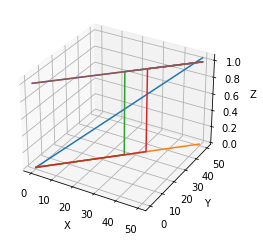

In [6]:
axes = plt.axes(projection="3d")

x = np.arange(0,50,0.1)
y = np.arange(0,50,0.1)

z_objective = 0.013 * x + 0.008 * y
z_PercentagesSum = x + y == 100
z_ProteinRequirement = 0.100 * x + 0.200 * y >= 8.0
z_FatRequirement = 0.080 * x + 0.100 * y >= 6.0
z_FibreRequirement = 0.001 * x + 0.005 * y <= 2.0
z_SaltRequirement = 0.002 * x + 0.005 * y <= 0.4

axes.plot(x,y,z_objective)
axes.plot(x,y,z_PercentagesSum)
axes.plot(x,y,z_ProteinRequirement)
axes.plot(x,y,z_FatRequirement)
axes.plot(x,y,z_FibreRequirement)
axes.plot(x,y,z_SaltRequirement)

axes.set_xlabel('X')
axes.set_ylabel('Y')
axes.set_zlabel('Z')

plt.show()

In [7]:
print(prob)

The_Whiskas_Problem:
MINIMIZE
0.008*BeefPercent + 0.013*ChickenPercent + 0.0
SUBJECT TO
PercentagesSum: BeefPercent + ChickenPercent = 100

ProteinRequirement: 0.2 BeefPercent + 0.1 ChickenPercent >= 8

FatRequirement: 0.1 BeefPercent + 0.08 ChickenPercent >= 6

FibreRequirement: 0.005 BeefPercent + 0.001 ChickenPercent <= 2

SaltRequirement: 0.005 BeefPercent + 0.002 ChickenPercent <= 0.4

VARIABLES
BeefPercent Continuous
0 <= ChickenPercent Integer



In [8]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

1

In [9]:
# The status of the solution is printed to the screen
print("Status:", pl.LpStatus[prob.status])

Status: Optimal


In [10]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

BeefPercent = 66.0
ChickenPercent = 34.0


In [11]:
# The optimised objective function value is printed to the screen
print("Total Cost of Ingredients per can = ", pl.value(prob.objective))

Total Cost of Ingredients per can =  0.97


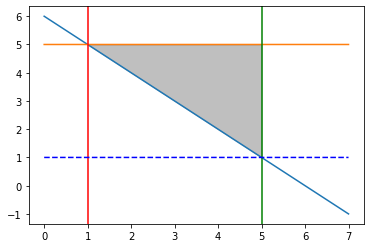

In [12]:
#I hold x a line while defining new values for each y
x = np.linspace(start=0, stop=7, num=2000)

#0*x[1] + 1*x[2] <= 5
y0 = 5 + x*0

#0*x[1] + 1*x[2] >= 1
y1 = 1 - x*0

#1*x[1] + 1*x[2] <= 6
y2 = 6 - x

plt.plot(x, y2)
plt.plot(x, y0)
plt.axvline(5, color='g') #y2 <  5
plt.axvline(1, color='r') #x  >= 1 
plt.plot(x, y1, 'b--')    #y3 >= 1

plt.fill_between(x, y0, y2, where=(x>1)&(x<5), color='grey', alpha=0.5)
plt.show()